# **Import Libraries**
importing important libraries.

In [0]:
import os
import tarfile
import urllib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Downloading the Data**
we will just download a single compressed file, housing.tgz, which contains a comma-separated value (CSV) file called housing.csv with all the data. Auto‐mating the process of fetching the data is also useful if you need to install the dataset on multiple machines.

In [0]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets" , "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_path = HOUSING_PATH , housing_url = HOUSING_URL):
  os.makedirs(housing_path , exist_ok=True)
  tgz_path = os.path.join(housing_path , "housing.tgz")
  urllib.request.urlretrieve(housing_url , tgz_path)
  housing_tgz = tarfile.open(tgz_path)
  housing_tgz.extractall(path=housing_path)
  housing_tgz.close()
  
def load_housing_data(housing_path = HOUSING_PATH):
  csv_path = os.path.join(housing_path , "housing.csv")
  return pd.read_csv(csv_path)

In [3]:
fetch_housing_data(HOUSING_PATH , HOUSING_URL)

housing = load_housing_data(HOUSING_PATH)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# **Understanding the Data and it's Structure**

The info() method is useful to get a quick description of the data, in particular the total number of rows, and each attribute’s type and number of non-null values

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


All attributes are numerical, except the ocean_proximity field. Its type is object. When I looked at the top five rows,  I noticed that the values in that column were repetitive, which means that it is probably a categorical attribute. We can find out what categories exist and how many districts belong to each category by using the value_counts() method

In [5]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

The describe() method shows a summary of the numerical attributes. The count, mean, min, and max rows are self-explanatory andthe null values are ignored. The 25%, 50%, and 75% rows show the corresponding percentiles: a percentile indicates the value below which a given percentage of observations in a group of observations falls.

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


A histogram shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis). We can either plot this one attribute at a time, or you can call the hist() method on the whole dataset, and it will plot a histogram for each numerical attribute

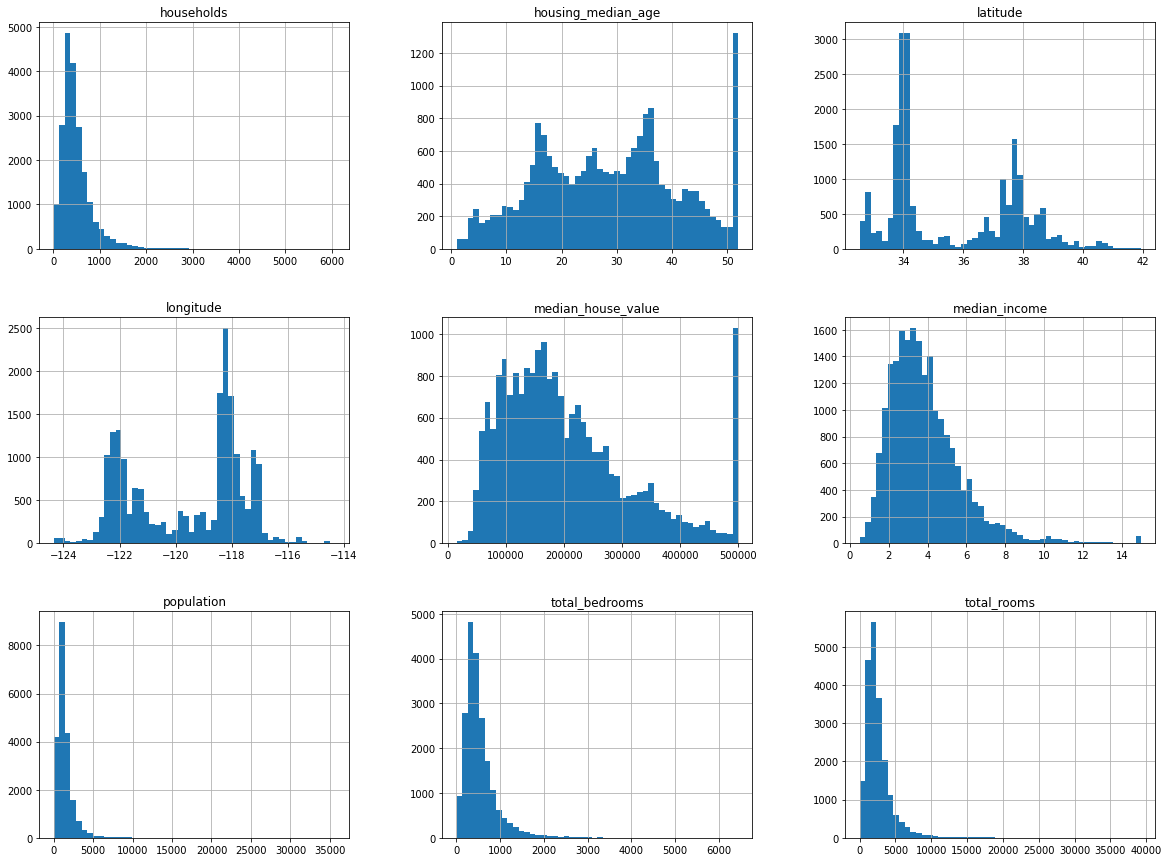

In [7]:
%matplotlib inline
housing.hist(bins = 50 , figsize=(20 , 15))
plt.show()

# **Things learnt from this histogram**
1. First, the median income attribute does not look like it is expressed in US dollars (USD). After checking I found that the data has been scaled and capped at 15 (actually 15.0001) for higher median incomes, and at 0.5 (actually 0.4999) for lower median incomes. 
2. The housing median age and the median house value were also capped. The latter may be a serious problem since it is my target attribute (the labels). It is possible that our  Machine Learning algorithms may learn that prices never go beyond that limit. We need to check to see if this is a problem or not. If we want precise predictions even beyond 500,000 dollars, then we have mainly two options:
a. Collect proper labels for the districts whose labels were capped.
b. Remove those districts from the training set (and also from the test set, since our system should not be evaluated poorly if it predicts values beyond $500,000).
3. These attributes have very different scales.
4. Finally, many histograms are tail heavy: they extend much farther to the right of the median than to the left.

# **Creating a Test Set**

randomly selecting 15% of the data as test and the rest as train

In [0]:
def split_train_test(data , test_ratio):
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data) * test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices] , data.iloc[test_indices]

In [9]:
train_set , test_set = split_train_test(housing , 0.18)
print(len(train_set) , "train + " , len(test_set) , "test")

16925 train +  3715 test
